# MPOA使用範例

## 新版MPOA可選optuna內建不同的演算法

| 演算法                                                             | 類型    | 適用情境                              | 優點                       | 缺點                   | 並行適合度                              |
| --------------------------------------------------------------- | ----- | --------------------------------- | ------------------------ | -------------------- | ---------------------------------- |
| **TPE**<br>(Tree-structured Parzen Estimator)                   | 貝葉斯優化 | 單目標、混合參數（連續 + 整數 + 分類）            | 探索/利用平衡佳，泛用性強，Optuna 預設  | 高維/多峰時可能卡住局部解        | ⚠️ 中等<br>依賴歷史 trial，並行多會重複，少量並行可接受 |
| **Random**                                                      | 隨機搜尋  | baseline、大規模探索                    | 簡單、完全無 bias，適合大規模並行      | 收斂慢，需要很多 trial 才找到好解 | ✅ 極佳<br>每個 trial 獨立，最適合大規模並行       |
| **CMA-ES**<br>(Covariance Matrix Adaptation Evolution Strategy) | 演化策略  | 連續數值參數優化                          | 收斂快，特別適合連續空間             | 不適合分類/離散參數；需要族群更新    | ⚠️ 有限制<br>一次要等一批完成，小規模並行 (2–4) 尚可  |
| **NSGA-II**<br>(Non-dominated Sorting Genetic Algorithm II)     | 基因演算法 | **多目標優化**（例：Sharpe ↑, Drawdown ↓） | 能找到 Pareto 最優集合，族群演化適合並行 | 單目標不適用；收斂比 TPE 慢     | ✅ 良好<br>族群演化天生適合並行，GPU/叢集友好        |
| **QMC**<br>(Quasi-Monte Carlo, Sobol/ Halton 等)                 | 準蒙地卡羅 | 需要均勻探索全域空間                        | 探索覆蓋均勻，比隨機快找到潛在區域        | 不利用歷史結果，後期收斂慢        | ✅ 極佳<br>序列獨立，非常適合大規模並行             |


#### bbrank_3_filter_ma200 TPE算法

C:\Users\fdgg4\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


檢測到策略函數 get_signals 的參數: ['symbol', 'interval', 'end_time', 'limit', 'bb_length', 'mult', 'ATR_period', 'lookback', 'rank_th', 'ATR_multi_SL']
檢測到策略函數參數: ['symbol', 'interval', 'end_time', 'limit', 'bb_length', 'mult', 'ATR_period', 'lookback', 'rank_th', 'ATR_multi_SL']
開始靈活參數優化...
複合指標方法: geometric
門檻條件: {'Sharpe Ratio': 1.0, 'Sortino Ratio': 1.5, 'Calmar Ratio': 0.5}
創建新資料庫: bbrank_3_filter_ma200_tpe.db


[I 2025-08-31 15:27:39,277] A new study created in RDB with name: bbrank_3_filter_ma200_tpe


載入資料庫失敗：'Record does not exist.'，建立新 study
警告：當前試驗數量 (0) 較少，建議至少運行 50 次試驗以確保分析可靠性


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-08-31 15:27:53,038] Trial 0 finished with value: 0.4159387128271148 and parameters: {'lookback': 500, 'rank_th': 76, 'ATR_multi_SL': 0.6}. Best is trial 0 with value: 0.4159387128271148.
[I 2025-08-31 15:27:56,194] Trial 1 finished with value: 1.229797930145422 and parameters: {'lookback': 800, 'rank_th': 90, 'ATR_multi_SL': 1.8}. Best is trial 1 with value: 1.229797930145422.
[I 2025-08-31 15:28:07,904] Trial 2 finished with value: 0.0010000000000000005 and parameters: {'lookback': 600, 'rank_th': 88, 'ATR_multi_SL': 0.9}. Best is trial 1 with value: 1.229797930145422.
[I 2025-08-31 15:28:11,666] Trial 3 finished with value: 0.0010000000000000005 and parameters: {'lookback': 700, 'rank_th': 74, 'ATR_multi_SL': 0.5}. Best is trial 1 with value: 1.229797930145422.
[I 2025-08-31 15:28:21,057] Trial 4 finished with value: 0.7566802382327473 and parameters: {'lookback': 500, 'rank_th': 90, 'ATR_multi_SL': 0.8}. Best is trial 1 with value: 1.229797930145422.
[I 2025-08-31 15:28:25,3

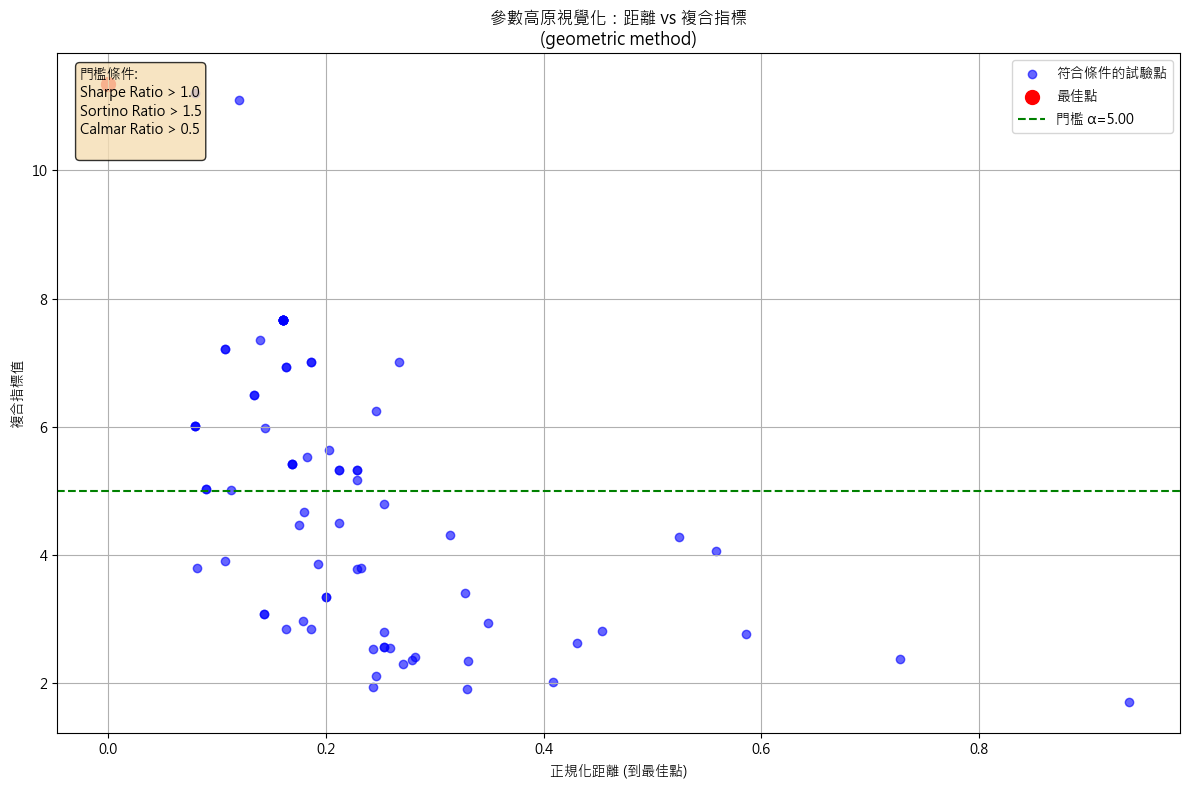


生成 optimize_params vs PPScore 熱力圖...
選擇與 composite_metric 相關性最高的參數：rank_th (相關係數: 0.500), ATR_multi_SL (相關係數: 0.353)


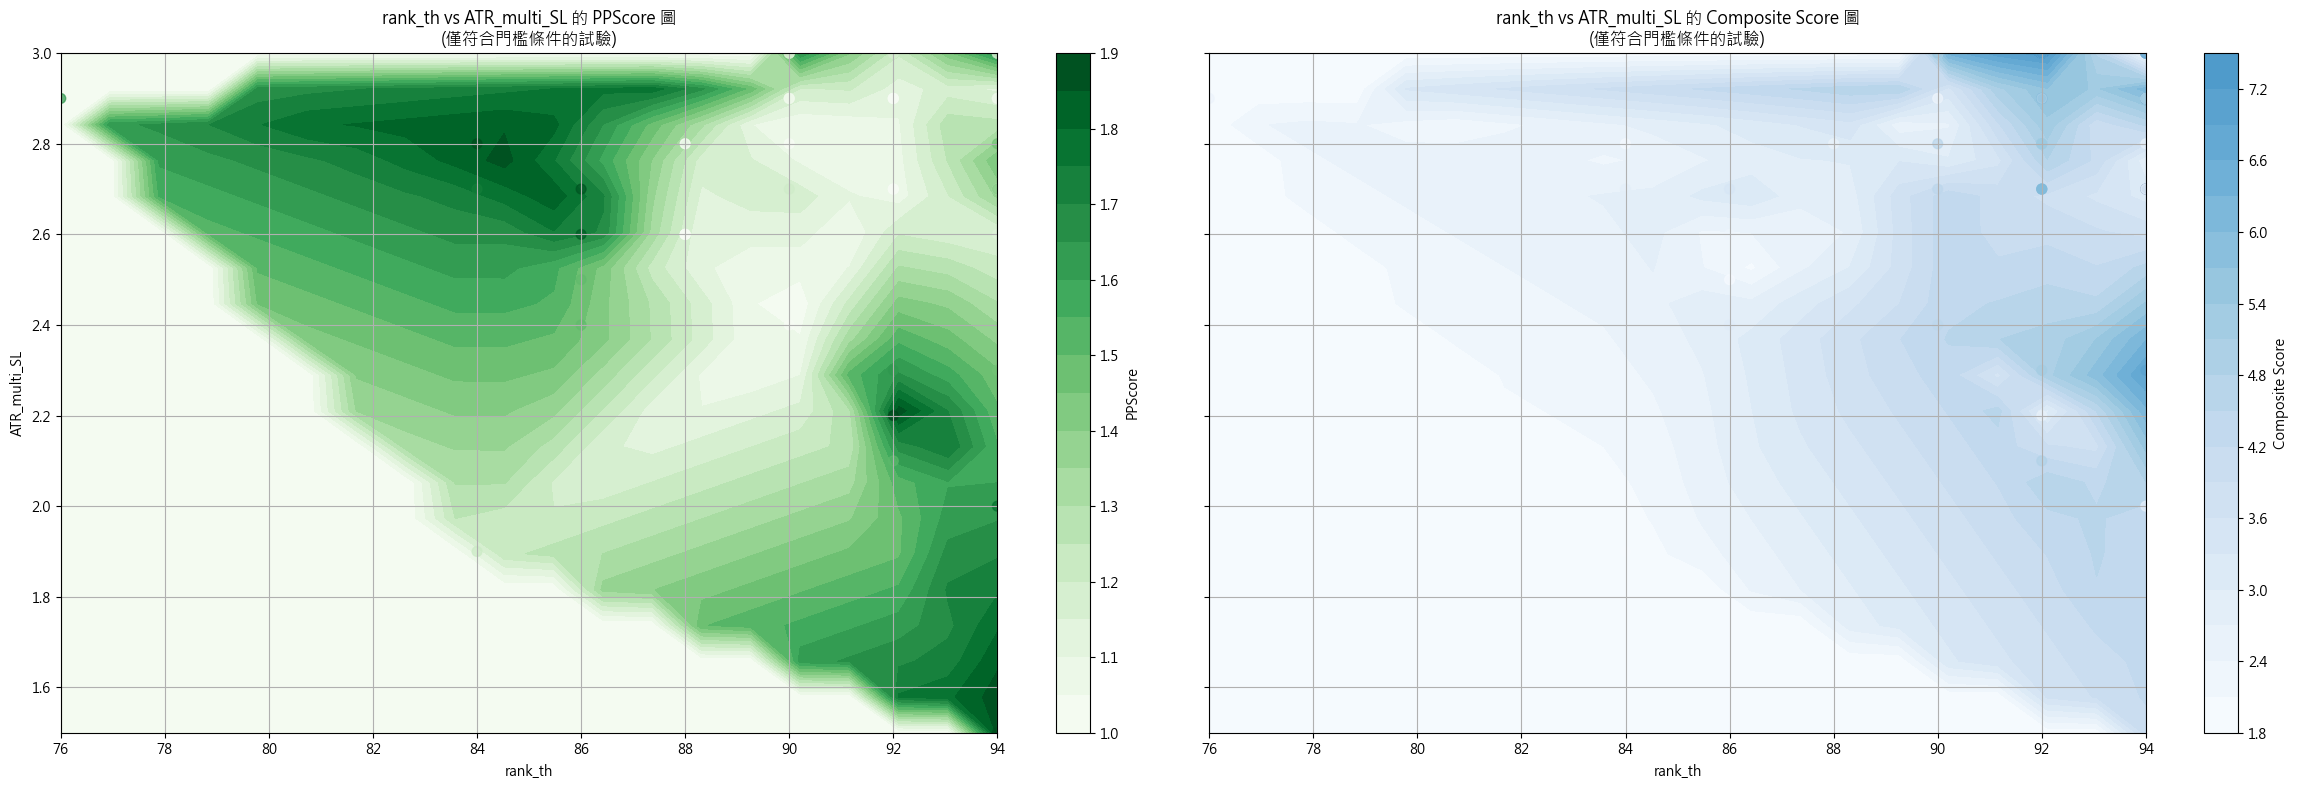


優化摘要:
總試驗數: 100
符合條件試驗數: 80
篩選率: 80.00%
符合門檻條件的試驗: 80 / 100

符合門檻條件試驗的多指標相關性分析:
  Sharpe Ratio vs Sortino Ratio: 0.979
  Sharpe Ratio vs Calmar Ratio: 0.918
  Sharpe Ratio vs composite_metric: 0.975
  Sortino Ratio vs Calmar Ratio: 0.944
  Sortino Ratio vs composite_metric: 0.988
  Calmar Ratio vs composite_metric: 0.980



帕雷托前沿分析（符合門檻條件）：
  符合條件的試驗數：80
  帕雷托最優解數量：3

前3個帕雷托解：
  解 1：
    Sharpe Ratio: 4.0869
    Sortino Ratio: 14.6734
    Calmar Ratio: 24.3708
    使用的參數：
      lookback: 250
      rank_th: 94
      ATR_multi_SL: 2.7

  解 2：
    Sharpe Ratio: 4.0775
    Sortino Ratio: 15.6092
    Calmar Ratio: 21.5034
    使用的參數：
      lookback: 250
      rank_th: 94
      ATR_multi_SL: 3.0

  解 3：
    Sharpe Ratio: 4.0241
    Sortino Ratio: 15.1144
    Calmar Ratio: 23.1666
    使用的參數：
      lookback: 250
      rank_th: 94
      ATR_multi_SL: 2.9000000000000004


2. 繪製 HiPlot 交互式圖表:


<IPython.core.display.Javascript object>

HiPlot 視覺化已保存至 enhanced_optimization_results.html（符合門檻條件的試驗）

3. 相關性分析結果：
使用符合門檻條件的試驗數量: 80
過濾後的數據行數: 80

完整相關性矩陣（符合門檻條件的試驗）：
                  lookback  rank_th  ATR_multi_SL  Sharpe Ratio  Sortino Ratio  Calmar Ratio  composite_metric
lookback             1.000   -0.024        -0.380         0.001         -0.022        -0.039            -0.025
rank_th             -0.024    1.000         0.058         0.529          0.523         0.445             0.500
ATR_multi_SL        -0.380    0.058         1.000         0.262          0.349         0.372             0.353
Sharpe Ratio         0.001    0.529         0.262         1.000          0.979         0.918             0.975
Sortino Ratio       -0.022    0.523         0.349         0.979          1.000         0.944             0.988
Calmar Ratio        -0.039    0.445         0.372         0.918          0.944         1.000             0.980
composite_metric    -0.025    0.500         0.353         0.975          0.988         0.980     

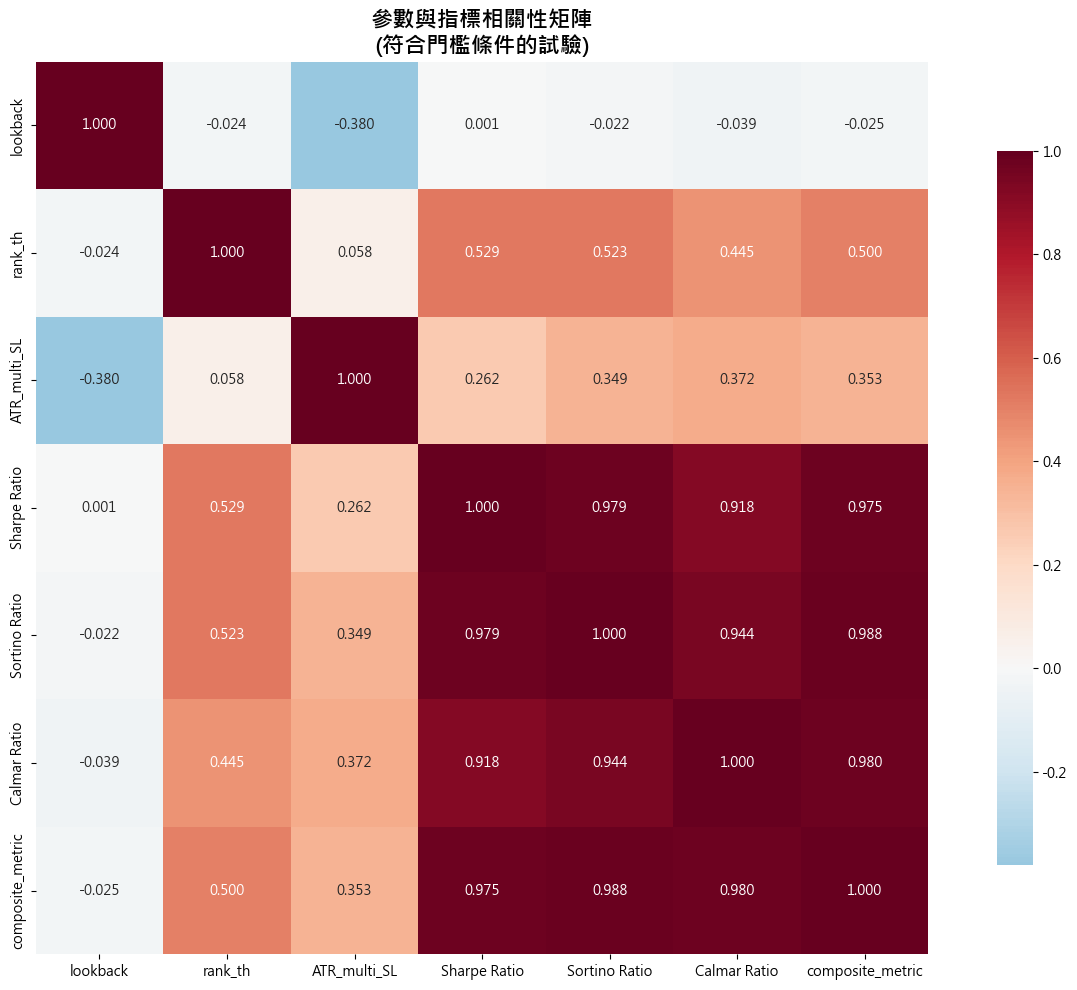

In [ ]:
from Multi_parameter_optimization_analysis import MPOA
from Technicalindicatorstrategy import bbrank_3_filter_ma200 #放你的策略
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 1. 自動檢測參數
# param_suggestions = MPOA.auto_detect_strategy_params(bbrank_3_filter_ma200, 'get_signals')

# 2. 創建配置
config = MPOA.create_custom_strategy_config(
    strategy_module=bbrank_3_filter_ma200,
    strategy_function='get_signals',  #改成你的策略
    param_config={
        'optimize_config': {
            'sampler': 'tpe',  # 想用哪種演算法，換字串即可可選: 'tpe', 'random', 'cmaes', 'nsga2', 'qmc'
            'seed': 42
        },
        'fixed_params': {'symbol': 'ETHUSDT', 
                        'interval': '1h',
                        'end_time':datetime.now(),
                        'limit': 10000,
                        'bb_length': 20,
                        'mult': 2.0,
                        'ATR_period': 20
                        },
        'optimize_params': {
            'lookback': {'type': 'int', 'min': 100, 'max': 800,'step': 50},
            'rank_th': {'type': 'int', 'min': 70, 'max': 95,'step': 2},
            'ATR_multi_SL': {'type': 'float', 'min': 0.5, 'max': 3.0,'step': 0.1}
        },
        'target_metrics': ['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'],
        'composite_config': {
            'method': 'geometric',  # 'weighted' 或 'geometric'
            'weights': {
                'Sharpe Ratio': 0.4,
                'Sortino Ratio': 0.4,
                'Calmar Ratio': 0.2
            },
            'thresholds': {
                'Sharpe Ratio': 1.0,
                'Sortino Ratio': 1.5,
                'Calmar Ratio': 0.5
            }
        },
        'backtest_config': {
            'initial_capital': 1000000,
            'fee_rate': 0.0005,
            'leverage': 1
        }
    }
)

optimizer = MPOA.FlexibleStrategyOptimizer(config)
study = optimizer.run_optimization(n_trials=100, n_jobs=2, study_name="bbrank_3_filter_ma200_tpe")

# 獲取優化摘要
summary = optimizer.get_optimization_summary()
print("\n優化摘要:")
print(f"總試驗數: {summary['total_trials']}")
print(f"符合條件試驗數: {summary['valid_trials']}")
print(f"篩選率: {summary['filter_rate']:.2%}")

# 多指標分析
trials_df = optimizer.analyze_multi_metric_results()

# 帕雷托前沿分析
optimizer.pareto_frontier_analysis()

# HiPlot 視覺化
print("\n2. 繪製 HiPlot 交互式圖表:")
optimizer.plot_hiplot(output_html="enhanced_optimization_results.html")

# 相關性分析
print("\n3. 相關性分析結果：")
corr_results = optimizer.analyze_param_metric_correlations()

#### bbrank_3_filter_ma200 nsga2算法 並行

C:\Users\fdgg4\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


檢測到策略函數 get_signals 的參數: ['symbol', 'interval', 'end_time', 'limit', 'bb_length', 'mult', 'ATR_period', 'lookback', 'rank_th', 'ATR_multi_SL']
檢測到策略函數參數: ['symbol', 'interval', 'end_time', 'limit', 'bb_length', 'mult', 'ATR_period', 'lookback', 'rank_th', 'ATR_multi_SL']
開始靈活參數優化...
複合指標方法: geometric
門檻條件: {'Sharpe Ratio': 1.0, 'Sortino Ratio': 1.5, 'Calmar Ratio': 0.5}
創建新資料庫: bbrank_3_filter_ma200_nsga2.db


[I 2025-08-31 15:59:53,040] A new study created in RDB with name: bbrank_3_filter_ma200_nsga2


載入資料庫失敗：'Record does not exist.'，建立新 study
警告：當前試驗數量 (0) 較少，建議至少運行 50 次試驗以確保分析可靠性


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2025-08-31 16:00:11,601] Trial 2 finished with value: 2.2791807244194975 and parameters: {'lookback': 500, 'rank_th': 90, 'ATR_multi_SL': 2.9000000000000004}. Best is trial 2 with value: 2.2791807244194975.
[I 2025-08-31 16:00:21,050] Trial 3 finished with value: 0.0010000000000000005 and parameters: {'lookback': 100, 'rank_th': 82, 'ATR_multi_SL': 0.8}. Best is trial 2 with value: 2.2791807244194975.
[I 2025-08-31 16:00:24,401] Trial 6 finished with value: 1.238084793245006 and parameters: {'lookback': 150, 'rank_th': 84, 'ATR_multi_SL': 0.6}. Best is trial 2 with value: 2.2791807244194975.
[I 2025-08-31 16:00:27,265] Trial 4 finished with value: 3.0951216534287176 and parameters: {'lookback': 450, 'rank_th': 86, 'ATR_multi_SL': 2.1}. Best is trial 4 with value: 3.0951216534287176.
[I 2025-08-31 16:00:30,596] Trial 1 finished with value: 0.8145986727409616 and parameters: {'lookback': 350, 'rank_th': 78, 'ATR_multi_SL': 2.5}. Best is trial 4 with value: 3.0951216534287176.
[I 2025-

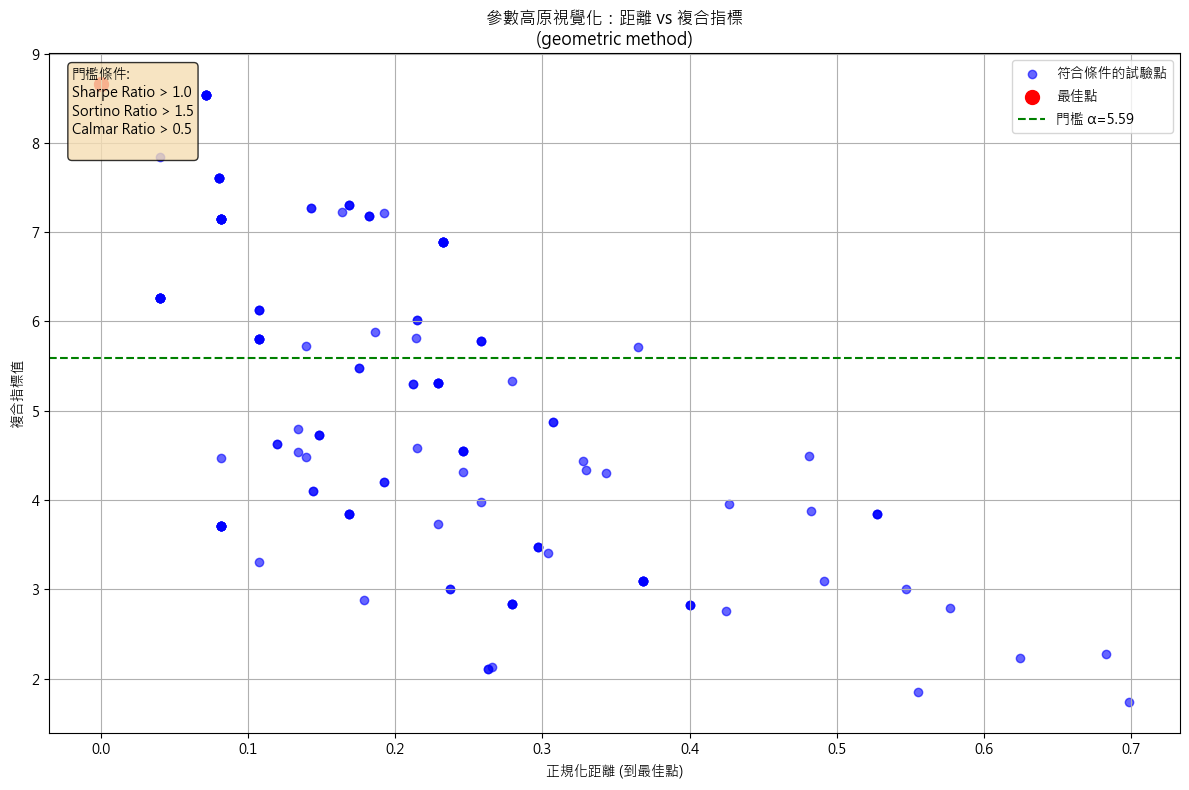


生成 optimize_params vs PPScore 熱力圖...
選擇與 composite_metric 相關性最高的參數：rank_th (相關係數: 0.536), lookback (相關係數: -0.214)


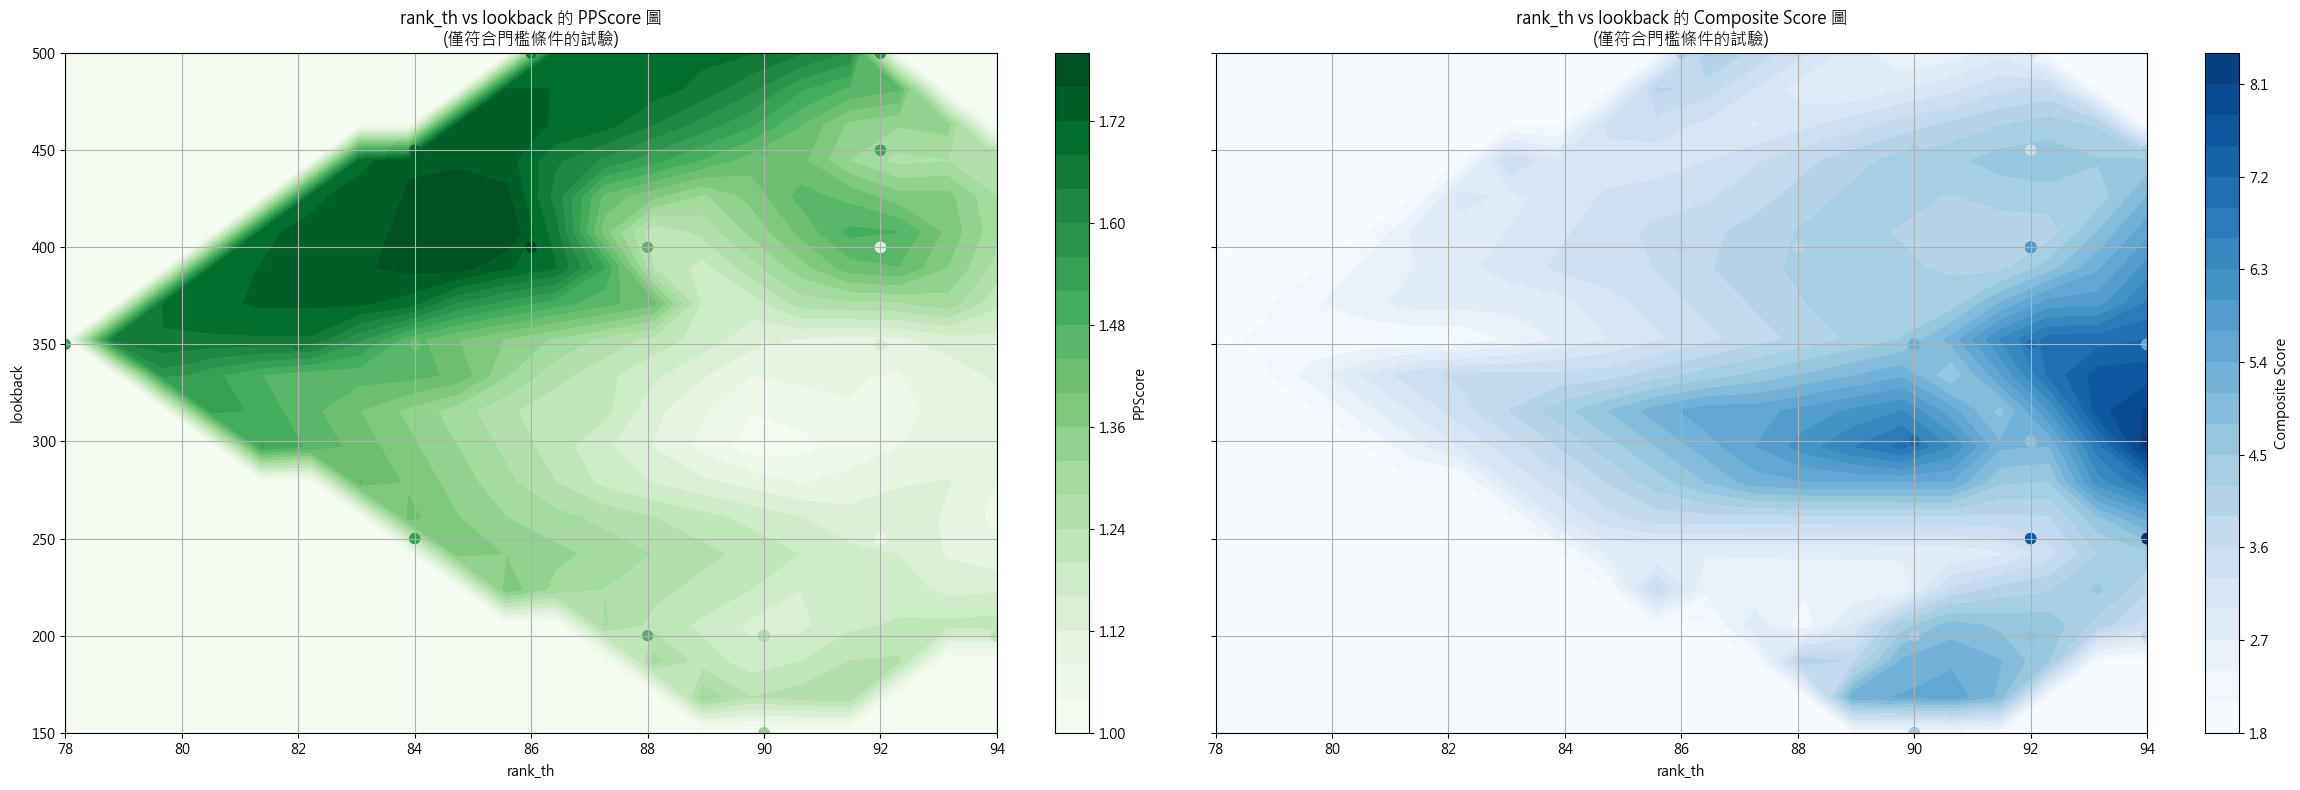


優化摘要:
總試驗數: 200
符合條件試驗數: 177
篩選率: 88.50%
符合門檻條件的試驗: 177 / 200

符合門檻條件試驗的多指標相關性分析:
  Sharpe Ratio vs Sortino Ratio: 0.975
  Sharpe Ratio vs Calmar Ratio: 0.815
  Sharpe Ratio vs composite_metric: 0.945
  Sortino Ratio vs Calmar Ratio: 0.901
  Sortino Ratio vs composite_metric: 0.986
  Calmar Ratio vs composite_metric: 0.958



帕雷托前沿分析（符合門檻條件）：
  符合條件的試驗數：177
  帕雷托最優解數量：29

前3個帕雷托解：
  解 1：
    Sharpe Ratio: 3.7250
    Sortino Ratio: 10.5964
    Calmar Ratio: 9.5126
    使用的參數：
      lookback: 300
      rank_th: 90
      ATR_multi_SL: 1.7000000000000002

  解 2：
    Sharpe Ratio: 3.7246
    Sortino Ratio: 11.1917
    Calmar Ratio: 14.9237
    使用的參數：
      lookback: 300
      rank_th: 94
      ATR_multi_SL: 1.5

  解 3：
    Sharpe Ratio: 3.7246
    Sortino Ratio: 11.1917
    Calmar Ratio: 14.9237
    使用的參數：
      lookback: 300
      rank_th: 94
      ATR_multi_SL: 1.5


2. 繪製 HiPlot 交互式圖表:


<IPython.core.display.Javascript object>

HiPlot 視覺化已保存至 enhanced_optimization_results.html（符合門檻條件的試驗）

3. 相關性分析結果：
使用符合門檻條件的試驗數量: 177
過濾後的數據行數: 177

完整相關性矩陣（符合門檻條件的試驗）：
                  lookback  rank_th  ATR_multi_SL  Sharpe Ratio  Sortino Ratio  Calmar Ratio  composite_metric
lookback             1.000   -0.190         0.309        -0.058         -0.173        -0.305            -0.214
rank_th             -0.190    1.000        -0.337         0.501          0.543         0.503             0.536
ATR_multi_SL         0.309   -0.337         1.000         0.011         -0.063        -0.207            -0.120
Sharpe Ratio        -0.058    0.501         0.011         1.000          0.975         0.815             0.945
Sortino Ratio       -0.173    0.543        -0.063         0.975          1.000         0.901             0.986
Calmar Ratio        -0.305    0.503        -0.207         0.815          0.901         1.000             0.958
composite_metric    -0.214    0.536        -0.120         0.945          0.986         0.958   

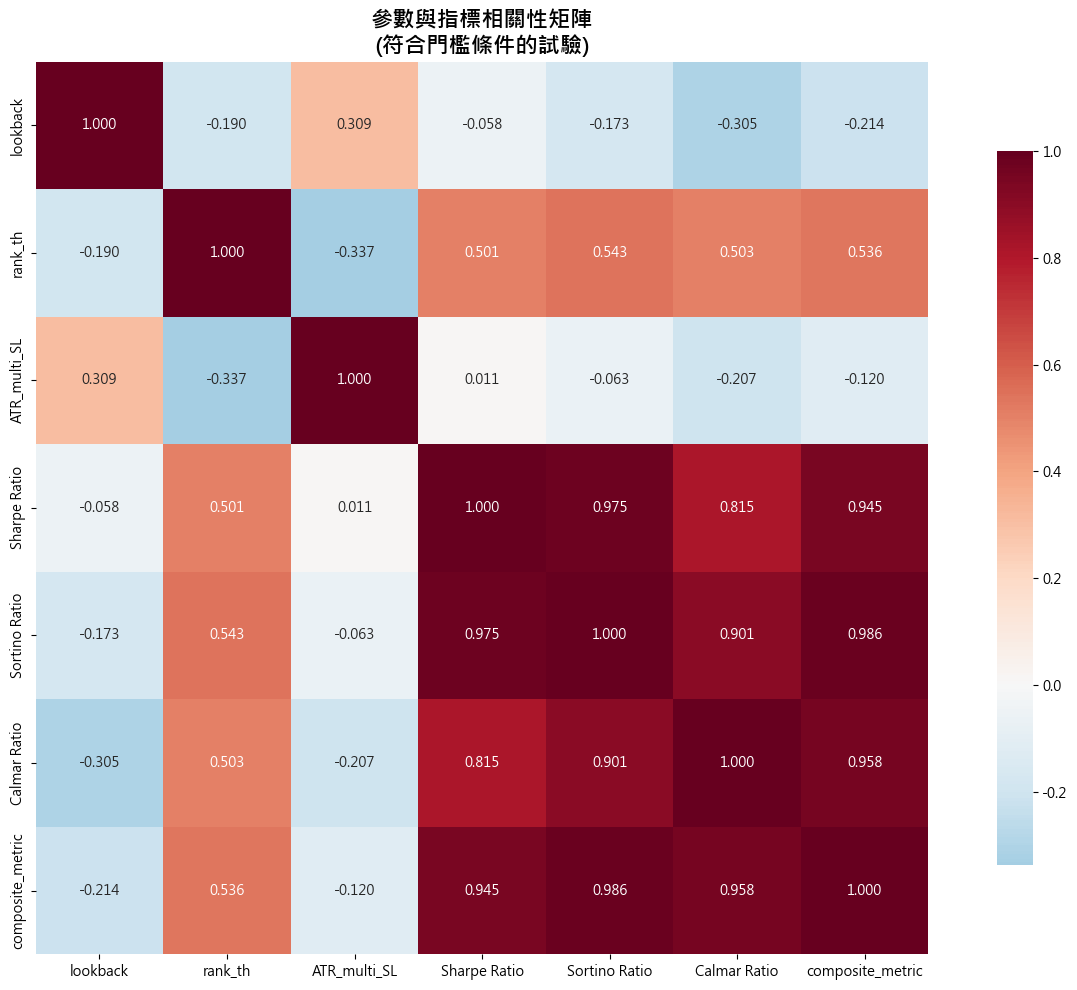

In [ ]:
from Multi_parameter_optimization_analysis import MPOA
from Technicalindicatorstrategy import bbrank_3_filter_ma200
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 1. 自動檢測參數
# param_suggestions = MPOA.auto_detect_strategy_params(bbrank_3_filter_ma200, 'get_signals')

# 2. 創建配置
config = MPOA.create_custom_strategy_config(
    strategy_module=bbrank_3_filter_ma200,
    strategy_function='get_signals',
    param_config={
        'optimize_config': {
            'sampler': 'nsga2',  # 想用哪種演算法，換字串即可可選: 'tpe', 'random', 'cmaes', 'nsga2', 'qmc'
            'seed': 42
        },
        'fixed_params': {'symbol': 'ETHUSDT',
                        'interval': '1h',
                        'end_time':datetime.now(),
                        'limit': 10000,
                        'bb_length': 20,
                        'mult': 2.0,
                        'ATR_period': 20
                        },
        'optimize_params': {
            'lookback': {'type': 'int', 'min': 100, 'max': 800,'step': 50},
            'rank_th': {'type': 'int', 'min': 70, 'max': 95,'step': 2},
            'ATR_multi_SL': {'type': 'float', 'min': 0.5, 'max': 3.0,'step': 0.1}
        },
        'target_metrics': ['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'],
        'composite_config': {
            'method': 'geometric',  # 'weighted' 或 'geometric'
            'weights': {
                'Sharpe Ratio': 0.4,
                'Sortino Ratio': 0.4,
                'Calmar Ratio': 0.2
            },
            'thresholds': {
                'Sharpe Ratio': 1.0,
                'Sortino Ratio': 1.5,
                'Calmar Ratio': 0.5
            }
        },
        'backtest_config': {
            'initial_capital': 1000000,
            'fee_rate': 0.0005,
            'leverage': 1
        }
    }
)

optimizer = MPOA.FlexibleStrategyOptimizer(config)
study = optimizer.run_optimization(n_trials=200, n_jobs=-1, study_name="bbrank_3_filter_ma200_nsga2")

# 獲取優化摘要
summary = optimizer.get_optimization_summary()
print("\n優化摘要:")
print(f"總試驗數: {summary['total_trials']}")
print(f"符合條件試驗數: {summary['valid_trials']}")
print(f"篩選率: {summary['filter_rate']:.2%}")

# 多指標分析
trials_df = optimizer.analyze_multi_metric_results()

# 帕雷托前沿分析
optimizer.pareto_frontier_analysis()

# HiPlot 視覺化
print("\n2. 繪製 HiPlot 交互式圖表:")
optimizer.plot_hiplot(output_html="enhanced_optimization_results.html")

# 相關性分析
print("\n3. 相關性分析結果：")
corr_results = optimizer.analyze_param_metric_correlations()

#### bbrank_3_filter_ma200 qmc算法 並行

檢測到策略函數 get_signals 的參數: ['symbol', 'interval', 'end_time', 'limit', 'bb_length', 'mult', 'ATR_period', 'lookback', 'rank_th', 'ATR_multi_SL']
檢測到策略函數參數: ['symbol', 'interval', 'end_time', 'limit', 'bb_length', 'mult', 'ATR_period', 'lookback', 'rank_th', 'ATR_multi_SL']
開始靈活參數優化...
複合指標方法: geometric
門檻條件: {'Sharpe Ratio': 1.0, 'Sortino Ratio': 1.5, 'Calmar Ratio': 0.5}
創建新資料庫: bbrank_3_filter_ma200_qmc.db
載入資料庫失敗：'Record does not exist.'，建立新 study


[I 2025-08-31 16:20:08,700] A new study created in RDB with name: bbrank_3_filter_ma200_qmc


警告：當前試驗數量 (0) 較少，建議至少運行 50 次試驗以確保分析可靠性


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2025-08-31 16:20:50,928] Trial 5 finished with value: 1.637655897742998 and parameters: {'lookback': 200, 'rank_th': 82, 'ATR_multi_SL': 2.6}. Best is trial 5 with value: 1.637655897742998.
[I 2025-08-31 16:20:57,011] Trial 1 finished with value: 1.9021239143044884 and parameters: {'lookback': 150, 'rank_th': 82, 'ATR_multi_SL': 2.4000000000000004}. Best is trial 1 with value: 1.9021239143044884.
[I 2025-08-31 16:21:00,318] Trial 3 finished with value: 1.6087803681929331 and parameters: {'lookback': 400, 'rank_th': 76, 'ATR_multi_SL': 2.4000000000000004}. Best is trial 1 with value: 1.9021239143044884.
[I 2025-08-31 16:21:04,019] Trial 7 finished with value: 2.4927242452840312 and parameters: {'lookback': 400, 'rank_th': 90, 'ATR_multi_SL': 1.7000000000000002}. Best is trial 7 with value: 2.4927242452840312.
[I 2025-08-31 16:21:07,533] Trial 0 finished with value: 0.23944535617965934 and parameters: {'lookback': 500, 'rank_th': 70, 'ATR_multi_SL': 2.5}. Best is trial 7 with value: 2

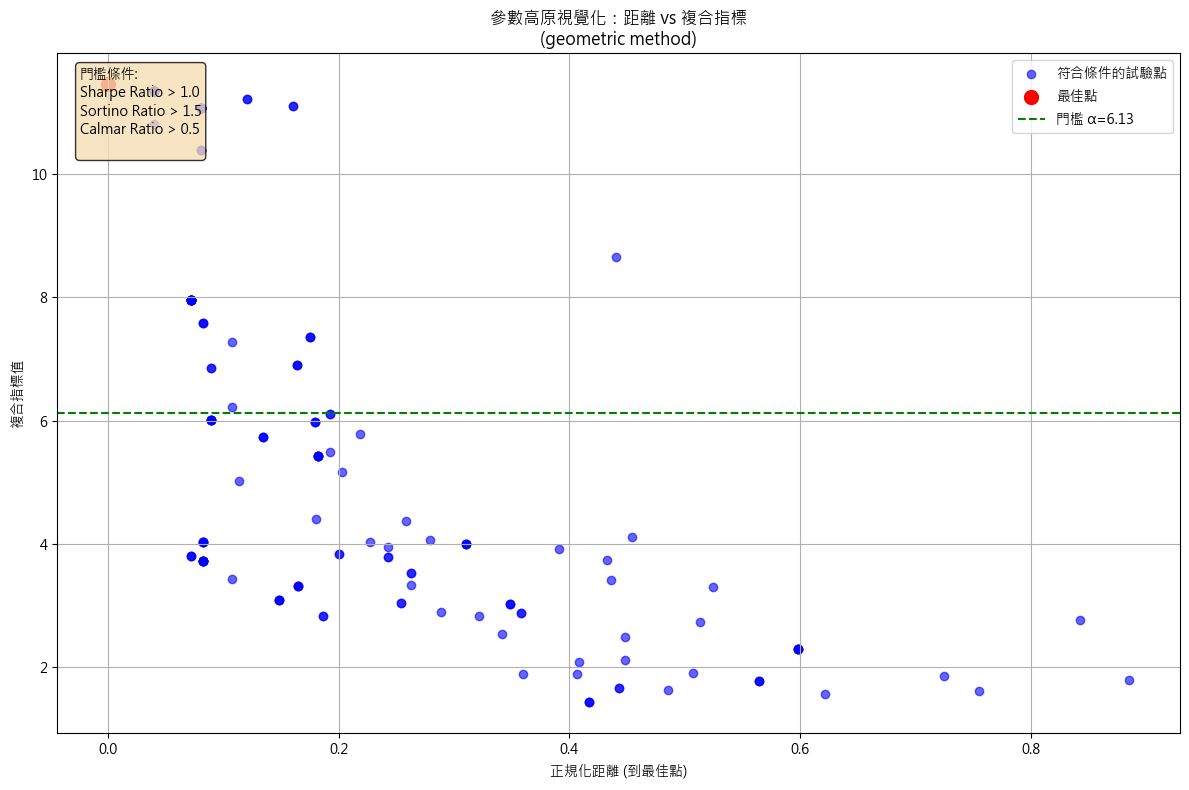


生成 optimize_params vs PPScore 熱力圖...
選擇與 composite_metric 相關性最高的參數：rank_th (相關係數: 0.507), ATR_multi_SL (相關係數: 0.358)


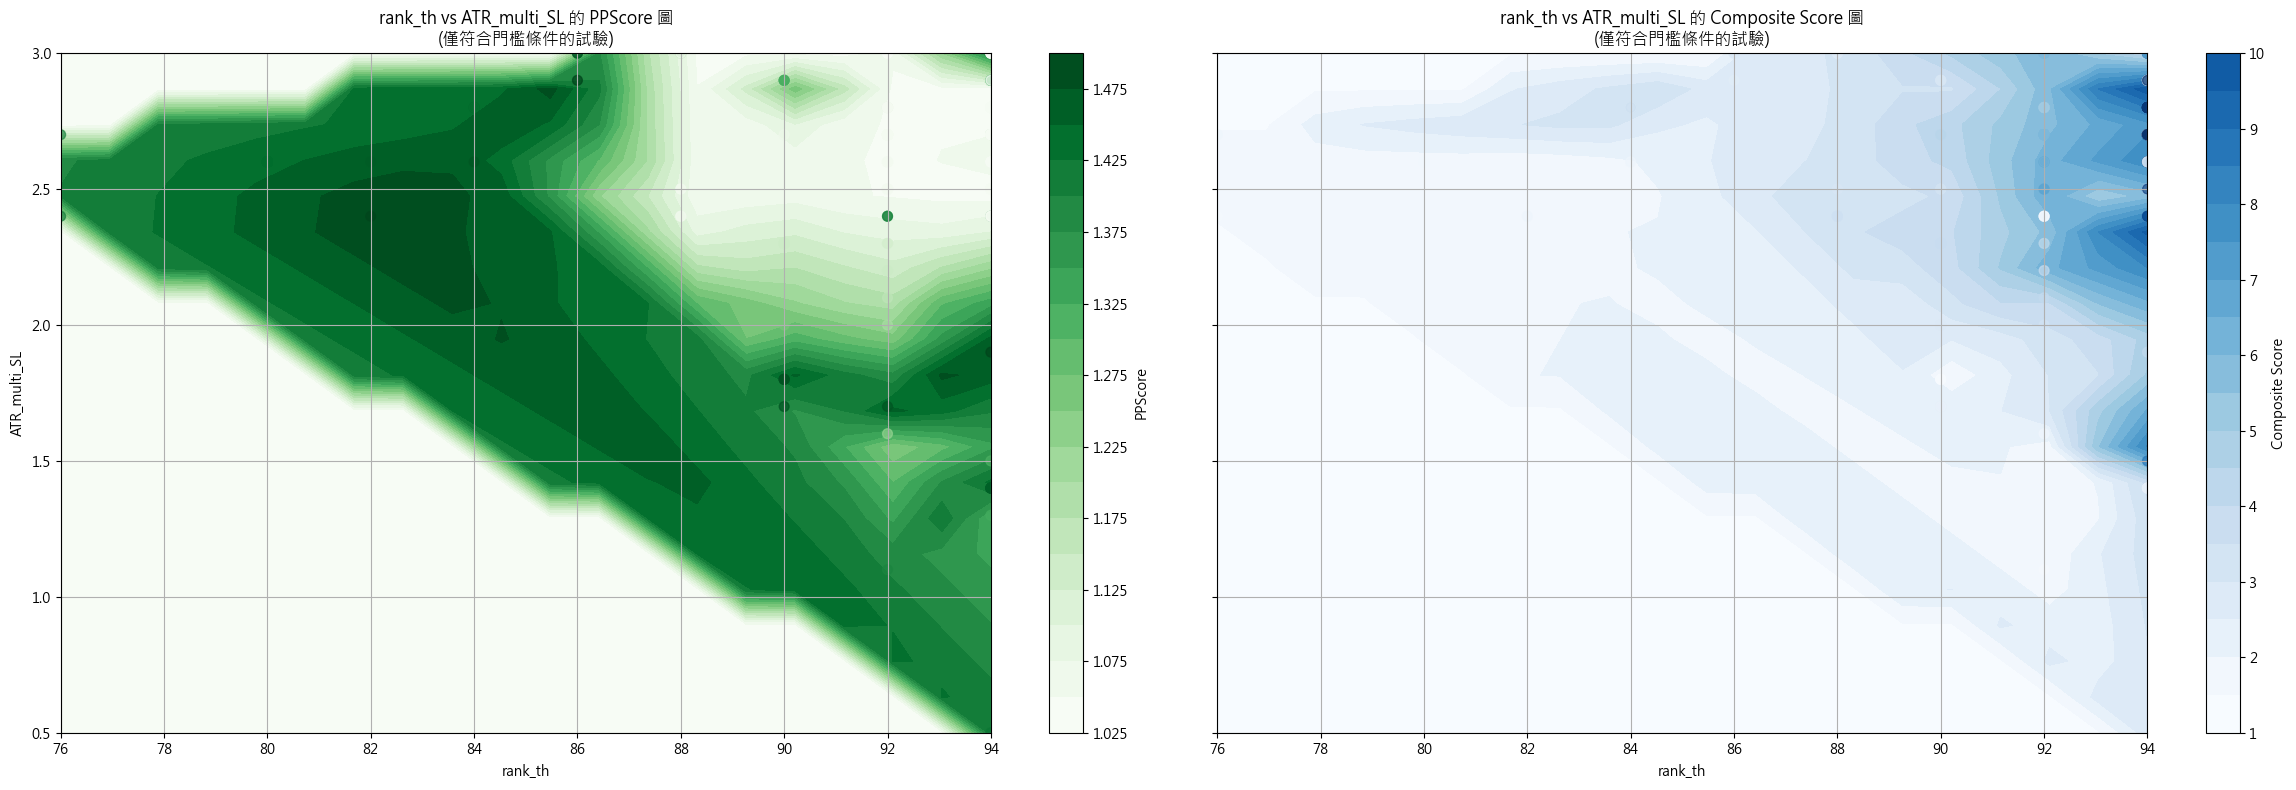


優化摘要:
總試驗數: 200
符合條件試驗數: 180
篩選率: 90.00%
符合門檻條件的試驗: 180 / 200

符合門檻條件試驗的多指標相關性分析:
  Sharpe Ratio vs Sortino Ratio: 0.979
  Sharpe Ratio vs Calmar Ratio: 0.941
  Sharpe Ratio vs composite_metric: 0.979
  Sortino Ratio vs Calmar Ratio: 0.973
  Sortino Ratio vs composite_metric: 0.994
  Calmar Ratio vs composite_metric: 0.989



帕雷托前沿分析（符合門檻條件）：
  符合條件的試驗數：180
  帕雷托最優解數量：29

前3個帕雷托解：
  解 1：
    Sharpe Ratio: 4.1209
    Sortino Ratio: 15.0845
    Calmar Ratio: 24.2082
    使用的參數：
      lookback: 250
      rank_th: 94
      ATR_multi_SL: 2.6

  解 2：
    Sharpe Ratio: 4.1209
    Sortino Ratio: 15.0845
    Calmar Ratio: 24.2082
    使用的參數：
      lookback: 250
      rank_th: 94
      ATR_multi_SL: 2.6

  解 3：
    Sharpe Ratio: 4.1209
    Sortino Ratio: 15.0845
    Calmar Ratio: 24.2082
    使用的參數：
      lookback: 250
      rank_th: 94
      ATR_multi_SL: 2.6


2. 繪製 HiPlot 交互式圖表:


<IPython.core.display.Javascript object>

HiPlot 視覺化已保存至 enhanced_optimization_results.html（符合門檻條件的試驗）

3. 相關性分析結果：
使用符合門檻條件的試驗數量: 180
過濾後的數據行數: 180

完整相關性矩陣（符合門檻條件的試驗）：
                  lookback  rank_th  ATR_multi_SL  Sharpe Ratio  Sortino Ratio  Calmar Ratio  composite_metric
lookback             1.000    0.048        -0.203        -0.137         -0.169        -0.167            -0.163
rank_th              0.048    1.000         0.005         0.537          0.510         0.469             0.507
ATR_multi_SL        -0.203    0.005         1.000         0.362          0.388         0.322             0.358
Sharpe Ratio        -0.137    0.537         0.362         1.000          0.979         0.941             0.979
Sortino Ratio       -0.169    0.510         0.388         0.979          1.000         0.973             0.994
Calmar Ratio        -0.167    0.469         0.322         0.941          0.973         1.000             0.989
composite_metric    -0.163    0.507         0.358         0.979          0.994         0.989   

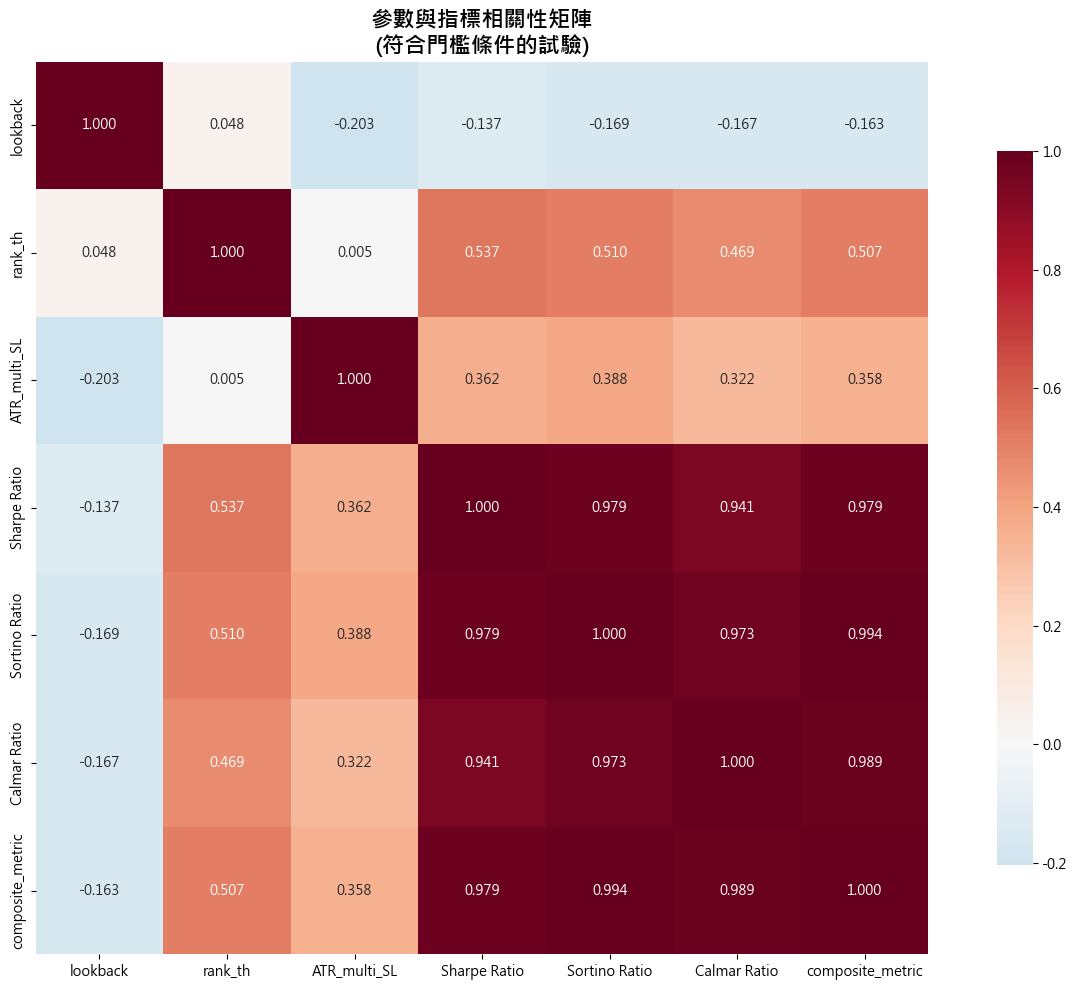

In [ ]:
from Multi_parameter_optimization_analysis import MPOA
from Technicalindicatorstrategy import bbrank_3_filter_ma200
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 1. 自動檢測參數
# param_suggestions = MPOA.auto_detect_strategy_params(bbrank_3_filter_ma200, 'get_signals')

# 2. 創建配置
config = MPOA.create_custom_strategy_config(
    strategy_module=bbrank_3_filter_ma200,
    strategy_function='get_signals',
    param_config={
        'optimize_config': {
            'sampler': 'qmc',  # 想用哪種演算法，換字串即可可選: 'tpe', 'random', 'cmaes', 'nsga2', 'qmc'
            'seed': 42
        },
        'fixed_params': {'symbol': 'ETHUSDT',
                        'interval': '1h',
                        'end_time':datetime.now(),
                        'limit': 10000,
                        'bb_length': 20,
                        'mult': 2.0,
                        'ATR_period': 20
                        },
        'optimize_params': {
            'lookback': {'type': 'int', 'min': 100, 'max': 800,'step': 50},
            'rank_th': {'type': 'int', 'min': 70, 'max': 95,'step': 2},
            'ATR_multi_SL': {'type': 'float', 'min': 0.5, 'max': 3.0,'step': 0.1}
        },
        'target_metrics': ['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'],
        'composite_config': {
            'method': 'geometric',  # 'weighted' 或 'geometric'
            'weights': {
                'Sharpe Ratio': 0.4,
                'Sortino Ratio': 0.4,
                'Calmar Ratio': 0.2
            },
            'thresholds': {
                'Sharpe Ratio': 1.0,
                'Sortino Ratio': 1.5,
                'Calmar Ratio': 0.5
            }
        },
        'backtest_config': {
            'initial_capital': 1000000,
            'fee_rate': 0.0005,
            'leverage': 1
        }
    }
)

optimizer = MPOA.FlexibleStrategyOptimizer(config)
study = optimizer.run_optimization(n_trials=200, n_jobs=-1, study_name="bbrank_3_filter_ma200_qmc")

# 獲取優化摘要
summary = optimizer.get_optimization_summary()
print("\n優化摘要:")
print(f"總試驗數: {summary['total_trials']}")
print(f"符合條件試驗數: {summary['valid_trials']}")
print(f"篩選率: {summary['filter_rate']:.2%}")

# 多指標分析
trials_df = optimizer.analyze_multi_metric_results()

# 帕雷托前沿分析
optimizer.pareto_frontier_analysis()

# HiPlot 視覺化
print("\n2. 繪製 HiPlot 交互式圖表:")
optimizer.plot_hiplot(output_html="enhanced_optimization_results.html")

# 相關性分析
print("\n3. 相關性分析結果：")
corr_results = optimizer.analyze_param_metric_correlations()